# 4.10 Coding Etiquette & Excel Reporting Part 2

## 01 Import libraries and dataframe
## 02 Make a customer Demographics Dataframe
## 03 Investigate Departments
### a) Purchases made by department
### b) Departments popularity by different demographics
## 04 Regional variations
### a) age
### b) income
### c) products
## 05 Data aggregation


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math
from matplotlib.ticker import StrMethodFormatter

In [5]:
# import dataframe (users that CFO requires, >5 orders)
pathData = r'C:\Users\Michael\Desktop\Career Foundry\02 Data Immersion Course\04 Python Fundamentals for Data Analysts\Instacart Basket Analysis 2023 11'
active_custs = pd.read_pickle(os.path.join(pathData, '02 Data', 'Prepared Data', 'high_activity.pkl'))

## 02 Make a New Customer Demographics DF

Remove duplicates based on use_id and just get the customer info without purchase info. Recreating the custoemr datafile, but with the new data flags about purchase type etc (but only for the active customers as defined by the CFO).

In [7]:
customers_02 = active_custs.drop(columns =['order_number', 'order_id',
                                           'orders_day_of_week', 'days_since_last_order',
                                           'product_id', 'add_to_cart_order',
                                          'reordered', 'product_name', 'aisle_id', 'department_id',
                                          'prices', 'busiest_days', 'busiest_period_of_day',
                                          'date_joined', 'department'])

In [12]:
customers_02.drop_duplicates(subset=['user_id'], inplace = True)

In [13]:
customers_02['Region'].value_counts(dropna = False).to_clipboard

<bound method NDFrame.to_clipboard of Region
South        54193
West         41481
Midwest      38376
Northeast    28581
Name: count, dtype: int64>

### 02 Investigate into departments

#### a) How many purchases are made in each department

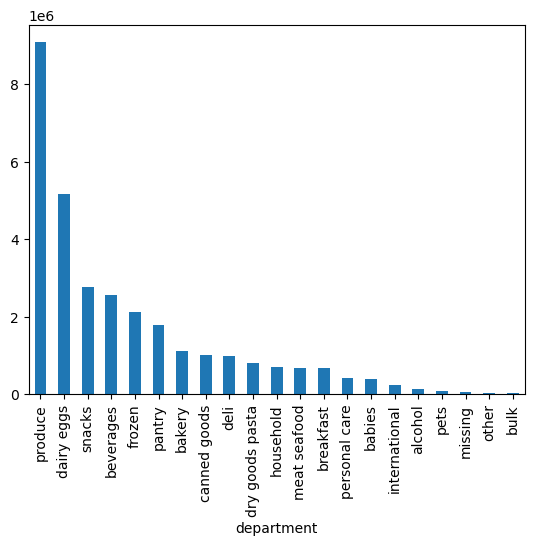

In [7]:
depts_bar = active_custs['department'].value_counts(dropna = False).plot.bar()
depts_bar.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'department_orders.png'))

In [8]:
department_income = active_custs.groupby('department')['prices'].sum()

In [9]:
department_income_frame = department_income.to_frame()

In [10]:
department_income_frame.to_csv(os.path.join(pathData, '02 Data','Prepared Data', 'department_income.csv'))

### b) Which departments are popular with
##### a) different age groups
##### b) income groups
##### c) dependancy groups

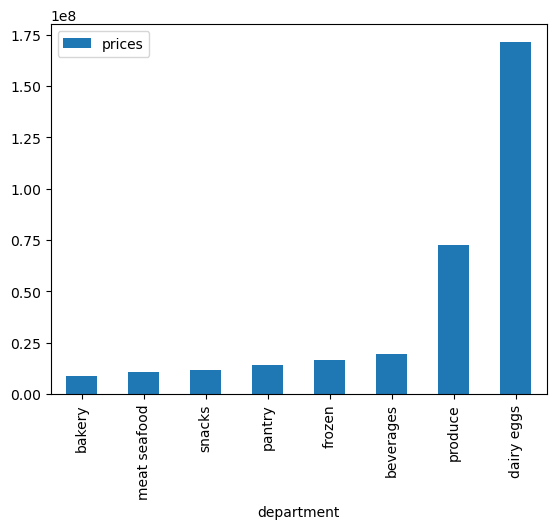

In [11]:
department_income_frame = pd.read_csv(os.path.join(pathData, '02 Data', 'Prepared Data', 'department_income.csv'))
# get the most popular departments
income_depts = department_income_frame.sort_values(by=['prices']).tail(8)
income_depts_bar = income_depts.plot.bar(x='department', y='prices')
income_depts_bar.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'income_depts_bar.png'))

In [12]:
popular_depts = income_depts['department'].tolist()

In [13]:
# make a subfame of all active customers spending on the top earning departments
active_top_depts = active_custs[active_custs['department'].isin(popular_depts)]

##### a) age groups

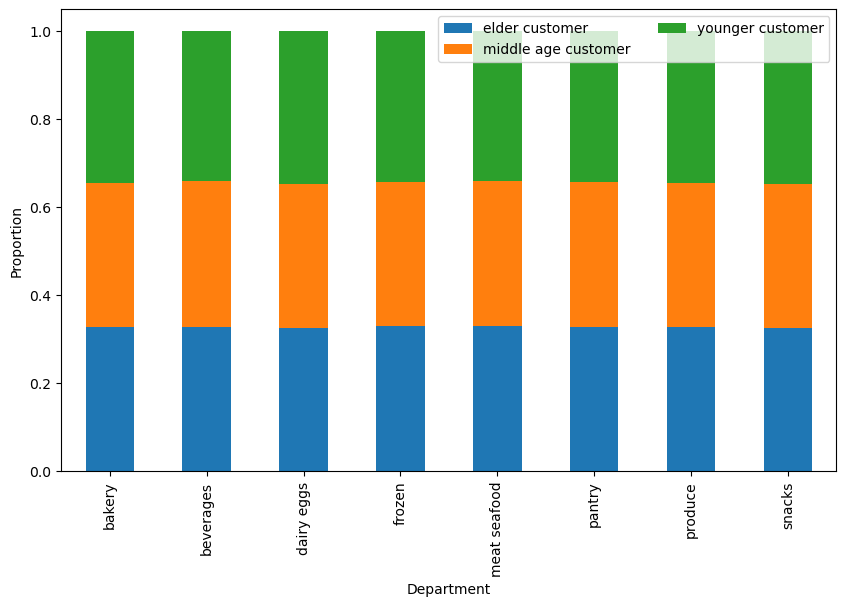

In [14]:
cross_age_dept_norm = pd.crosstab(
    active_top_depts['department'], active_top_depts['age_bracket'],
    dropna = False,
    normalize="index")

cross_age_dept_norm_plot = cross_age_dept_norm.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Department")
plt.ylabel("Proportion")
plt.show()

cross_age_dept_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'age_dept_norm_plot.png'))

##### b) income groups

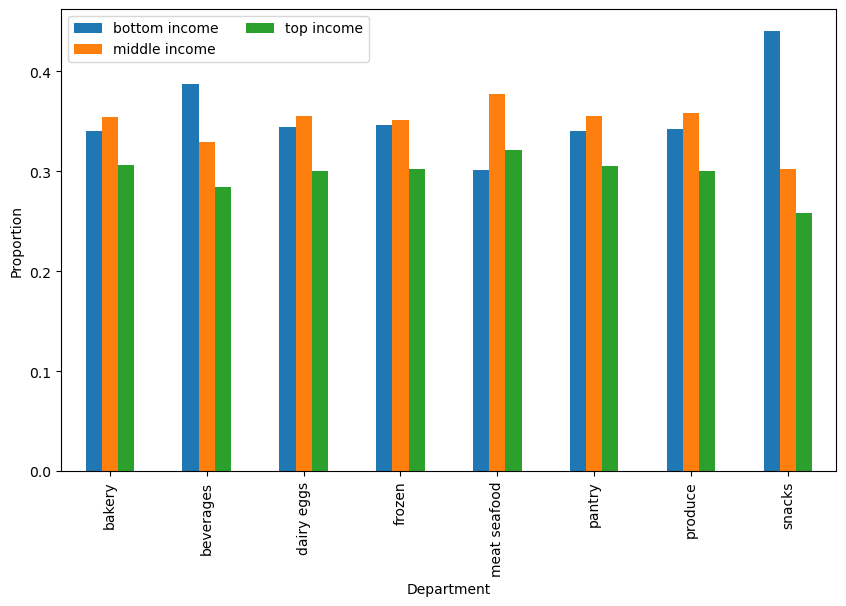

In [15]:
cross_income_dept_norm = pd.crosstab(
    active_top_depts['department'], active_top_depts['income_bracket'],
    dropna = False,
    normalize="index")

cross_income_dept_norm_plot = cross_income_dept_norm.plot(kind='bar', 
                    stacked= False, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Department")
plt.ylabel("Proportion")
plt.show()

cross_income_dept_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'income_dept_norm_plot.png'))

##### c) dependancy groups

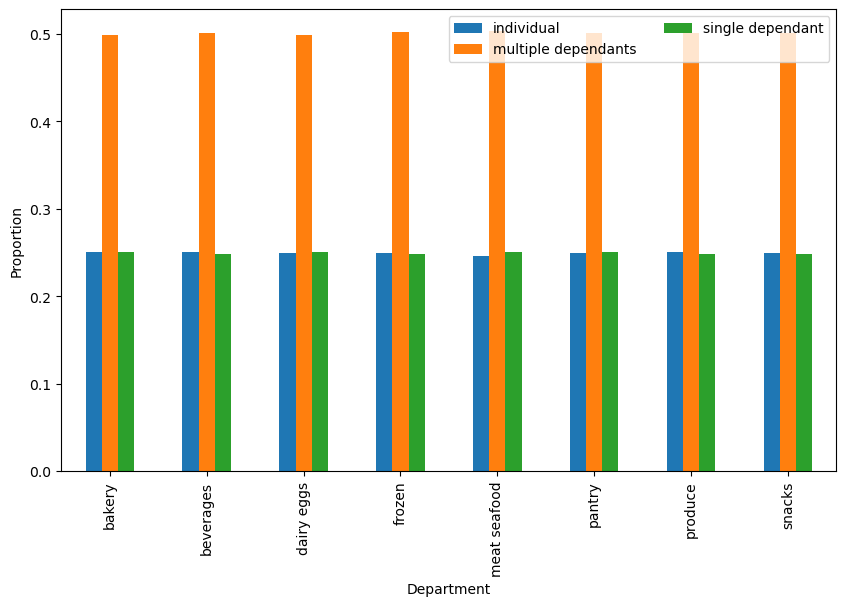

In [18]:
cross_depend_dept_norm = pd.crosstab(
    active_top_depts['department'], active_top_depts['dep_bracket'],
    dropna = False,
    normalize="index")

cross_depend_dept_norm_plot = cross_depend_dept_norm.plot(kind='bar', 
                    stacked= False, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Department")
plt.ylabel("Proportion")
plt.show()

cross_depend_dept_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'cross_depend_dept_norm_plot.png'))

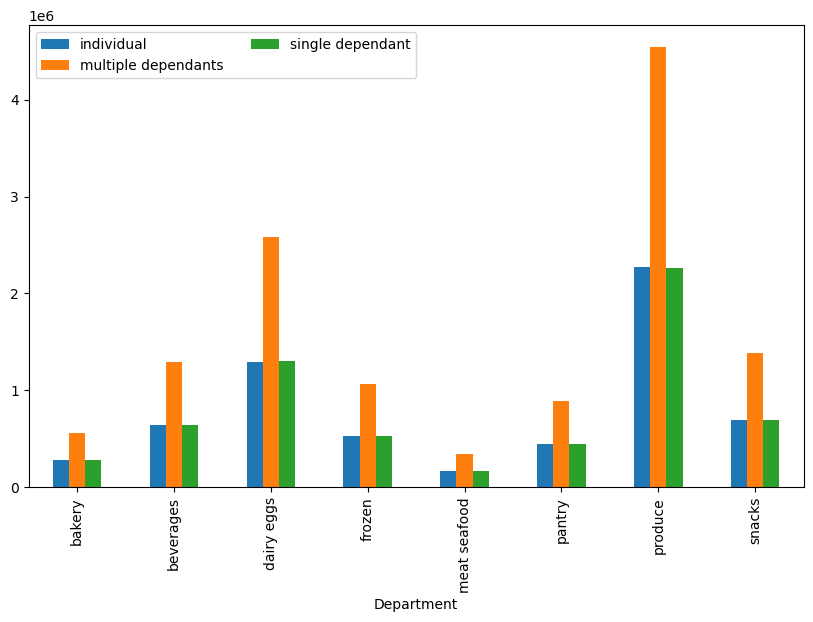

In [19]:
cross_depend_dept = pd.crosstab(
    active_top_depts['department'], active_top_depts['dep_bracket'],
    dropna = False)

cross_depend_dept_plot = cross_depend_dept.plot(kind='bar', 
                    stacked= False, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Department")
# plt.ylabel("Proportion")
plt.show()

cross_depend_dept_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'cross_depend_dept_plot.png'))

## 04 Regional variation
#### Age and region

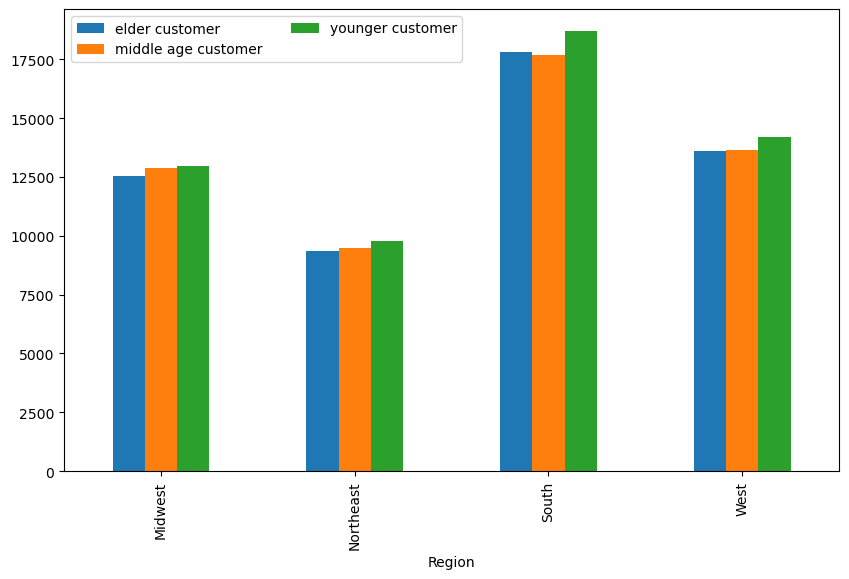

In [15]:
cross_age_region = pd.crosstab(
    customers_02['Region'], customers_02['age_bracket'],
    dropna = False)

cross_age_region_plot = cross_age_region.plot(kind='bar', 
                    stacked= False, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Region")
# plt.ylabel("Proportion")
plt.show()

cross_age_region_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'cross_age_region_plot.png'))

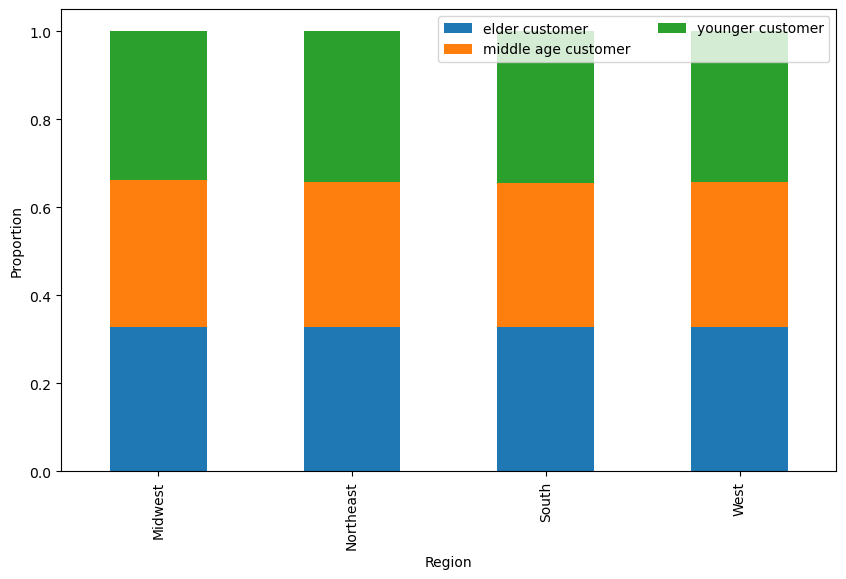

In [16]:
cross_age_region_norm = pd.crosstab(
    customers_02['Region'], customers_02['age_bracket'],
    dropna = False,
    normalize="index")

cross_age_region_norm_plot = cross_age_region_norm.plot(kind='bar', 
                    stacked= True, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.show()

cross_age_region_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'cross_age_region_norm_plot.png'))

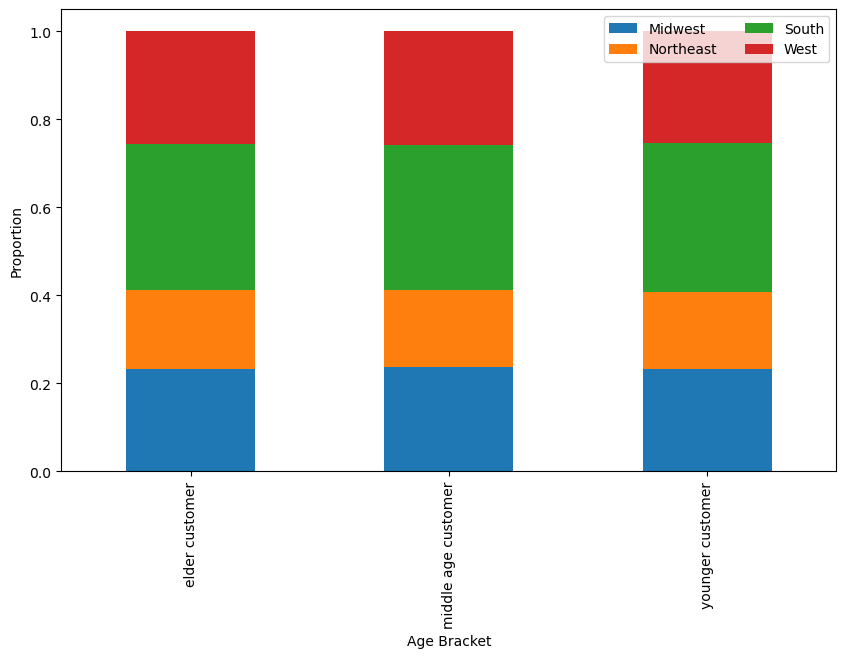

In [32]:
cross_age_region_norm = pd.crosstab(
    active_custs['age_bracket'], active_custs['Region'],
    dropna = False,
    normalize="index")

cross_age_region_norm_plot = cross_age_region_norm.plot(kind='bar', 
                    stacked= True, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Age Bracket")
plt.ylabel("Proportion")
plt.show()

cross_age_region_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'cross_region_age_norm_plot.png'))

In [28]:
cross_age_region.to_clipboard()

### Income and region

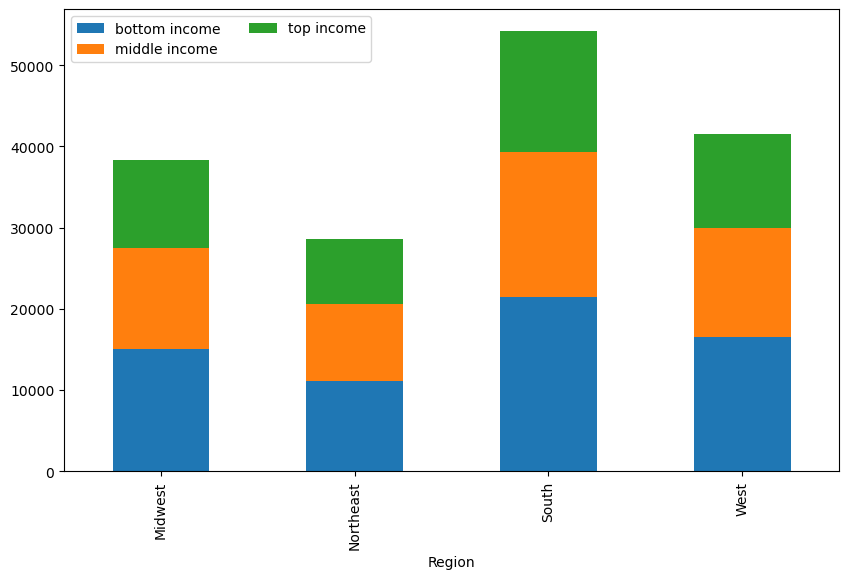

In [17]:
cross_income_region = pd.crosstab(
    customers_02['Region'], customers_02['income_bracket'],
    dropna = False)

cross_income_region_plot = cross_income_region.plot(kind='bar', 
                    stacked= True, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Region")
# plt.ylabel("Proportion")
plt.show()

cross_income_region_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'cross_income_region_plot.png'))

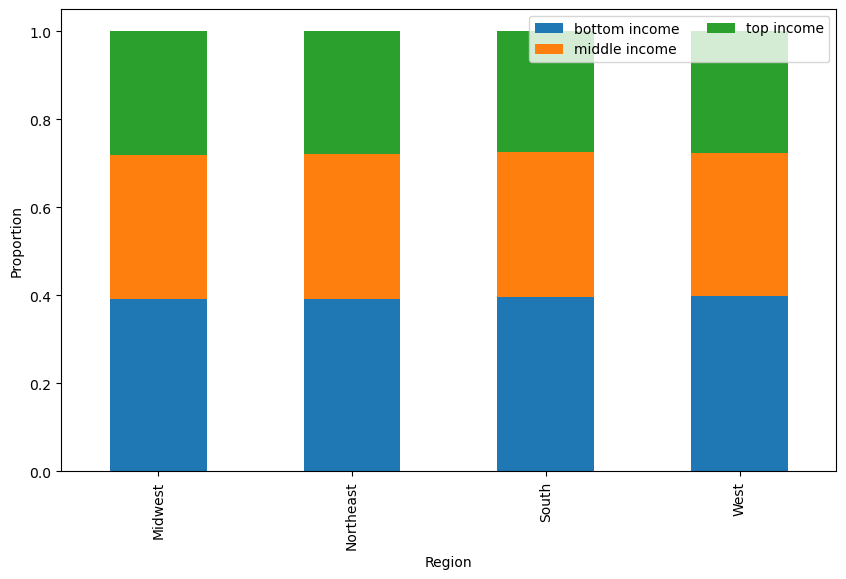

In [18]:
cross_income_region_norm = pd.crosstab(
    customers_02['Region'], customers_02['income_bracket'],
    dropna = False,
    normalize="index")

cross_income_region_norm_plot = cross_income_region_norm.plot(kind='bar', 
                    stacked= True, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.show()

cross_income_region_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'cross_income_region_norm_plot.png'))

## Region vs Products

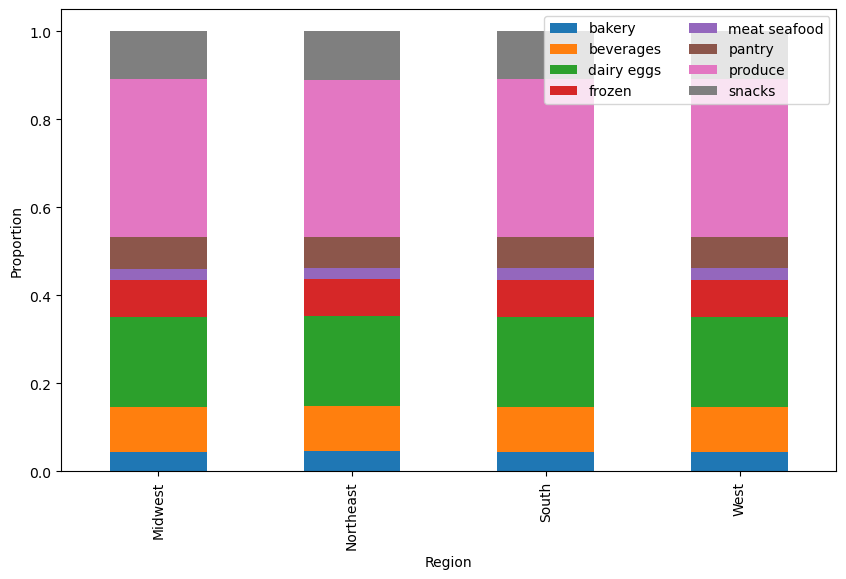

In [69]:
region_dept_norm = pd.crosstab(
    active_top_depts['Region'], active_top_depts['department'],
    dropna = False,
    normalize="index")

region_dept_norm_plot = region_dept_norm.plot(kind='bar', 
                    stacked= True, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.show()

region_dept_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'region_dept_norm_plot.png'))

# 05 Data Aggregation

In [48]:
active_custs.groupby('age_bracket').agg({'prices':['mean', 'std'], 'customer_income':['mean', 'std']})

prices             customer_income              
                          mean         std            mean           std
age_bracket                                                             
elder customer       11.806149  473.964118   115992.086330  42384.608515
middle age customer  11.932087  491.182408   113876.560418  43252.327368
younger customer     12.055665  507.424412    70641.017518  25008.982813

In [49]:
active_custs.groupby('Region').agg({'prices':['mean', 'std'], 'customer_income':['mean', 'std']})

prices             customer_income              
                mean         std            mean           std
Region                                                        
Midwest    12.681835  560.538798   100380.647818  44633.065859
Northeast  11.542582  461.827245    99745.286352  42703.706156
South      12.118845  501.725467    99242.561807  42623.675674
West       11.276491  425.125662    99546.021028  42712.306542

In [1]:
region_dept_norm_plot = active_top_depts['orders_day_of_week'].value_counts().plot(kind='bar', 
                    normalize="index",
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.show()

# region_dept_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'region_dept_norm_plot.png'))

NameError: name 'active_top_depts' is not defined

In [21]:
customers_02['activity_flag'].value_counts()

activity_flag
high activity    162631
Name: count, dtype: int64

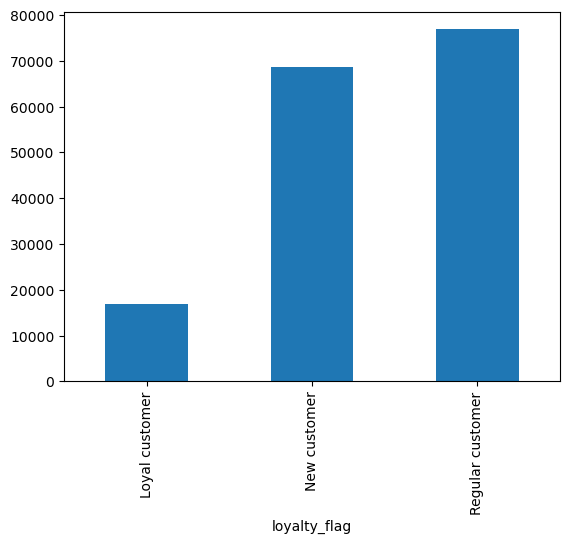

In [22]:
bar = customers_02['loyalty_flag'].value_counts().sort_index().plot.bar()

In [23]:
customers_02.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162631 entries, 0 to 30696453
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               162631 non-null  object 
 1   order_hour_of_day     162631 non-null  int64  
 2   price_range_loc       162631 non-null  object 
 3   max_order             162631 non-null  int64  
 4   loyalty_flag          162631 non-null  object 
 5   mean_spend            162631 non-null  object 
 6   order_frequency       162631 non-null  float64
 7   order_frequency_flag  162631 non-null  object 
 8   Gender                162631 non-null  object 
 9   customer_state        162631 non-null  object 
 10  customer_age          162631 non-null  int64  
 11  customer_dependants   162631 non-null  int64  
 12  fam_status            162631 non-null  object 
 13  customer_income       162631 non-null  int64  
 14  Region                162631 non-null  object 
 15  act

In [25]:
customers_02['mean_spend'].value_counts()

mean_spend
Low spender     111765
High spender     50866
Name: count, dtype: int64

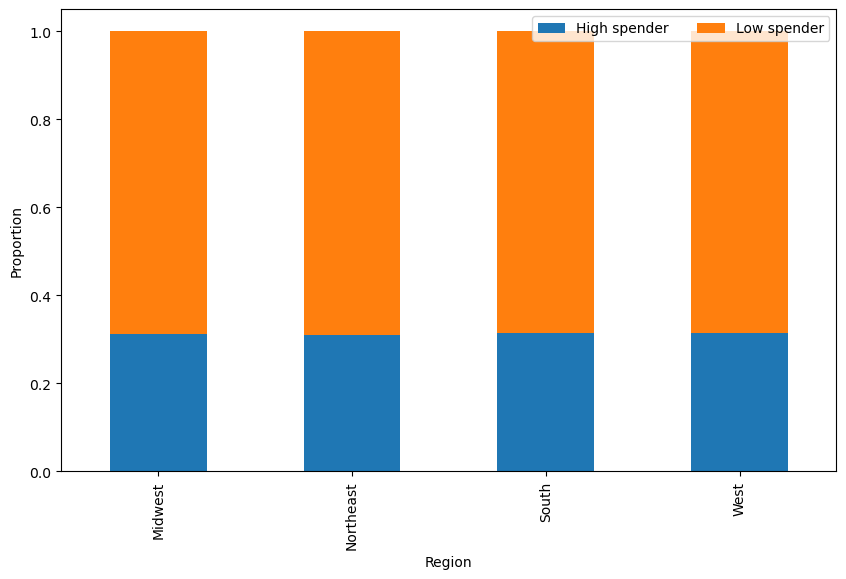

In [26]:
region_spend_norm = pd.crosstab(
    customers_02['Region'], customers_02['mean_spend'],
    dropna = False,
    normalize="index")

region_spend_norm_plot = region_spend_norm.plot(kind='bar', 
                    stacked= True, 
                    figsize=(10, 6))

plt.legend(loc="best", ncol=2)
plt.xlabel("Region")
plt.ylabel("Proportion")
plt.show()

region_spend_norm_plot.figure.savefig(os.path.join(pathData, '04 Analysis','Visualisations', 'region_spend_norm_plot.png'))